In [27]:
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint
from google.colab import files
import os

In [28]:
Class = 10
input_shape = (32, 32, 3)

In [29]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_val, y_val = x_train[40000:], y_train[40000:]
x_train, y_train = x_train[:40000], y_train[:40000]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255
print(x_val.shape)
print(x_train.shape)

(10000, 32, 32, 3)
(40000, 32, 32, 3)


In [30]:
print(y_train[0])
y_train = np_utils.to_categorical(y_train, Class, dtype='float32')
y_val = np_utils.to_categorical(y_val, Class, dtype='float32')
y_test = np_utils.to_categorical(y_test, Class, dtype='float32')
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [31]:
"""#keras.layers.LeakyReLU(alpha=0.3)
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))"""


"#keras.layers.LeakyReLU(alpha=0.3)\nmodel = Sequential()\nmodel.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape = input_shape))\nmodel.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\nmodel.add(Dense(512, activation='relu'))\nmodel.add(Dropout(0.4))\nmodel.add(Dense(10, activation='softmax'))"

In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

In [33]:
epochs = 300
Batch_size = 32

In [34]:
#keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
opt_sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = opt_sgd,
              metrics = ['accuracy'])

In [35]:
model.load_weights("weights-best-file.hdf5")

In [36]:
filepath = 'weights-best-file.hdf5'
checkpoint = ModelCheckpoint(filepath, 
                             monitor = 'val_acc', 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = 'max')
callbacks_list = [checkpoint]

In [37]:
#data augmentation
images_augmentation_train = ImageDataGenerator(height_shift_range=0.5,
                                         horizontal_flip=True,
                                         width_shift_range=0.2
                                         )

In [38]:
#His = model.fit(x_train, y_train, batch_size = Batch_size, validation_data=(x_val, y_val), epochs = epochs)

In [39]:
His = model.fit_generator(images_augmentation_train.flow(x_train, y_train, batch_size=32), 
                          steps_per_epoch=len(x_train)//32, epochs = epochs,
                          verbose = 1,
                          validation_data = (x_val, y_val),
                          validation_steps = len(x_val)//32,
                          callbacks = callbacks_list)

Epoch 1/300
1250/1250 [==============================] - 23s 18ms/step - loss: 2.1055 - accuracy: 0.2262 - val_loss: 1.7765 - val_accuracy: 0.3173
Epoch 2/300
1250/1250 [==============================] - 22s 18ms/step - loss: 1.8460 - accuracy: 0.3073 - val_loss: 1.8624 - val_accuracy: 0.3177
Epoch 3/300
1250/1250 [==============================] - 22s 18ms/step - loss: 1.7077 - accuracy: 0.3738 - val_loss: 1.8185 - val_accuracy: 0.4015
Epoch 4/300
1250/1250 [==============================] - 23s 18ms/step - loss: 1.5981 - accuracy: 0.4250 - val_loss: 1.5705 - val_accuracy: 0.4844
Epoch 5/300
1250/1250 [==============================] - 23s 18ms/step - loss: 1.5022 - accuracy: 0.4711 - val_loss: 1.8391 - val_accuracy: 0.4759
Epoch 6/300
1250/1250 [==============================] - 22s 18ms/step - loss: 1.4311 - accuracy: 0.4948 - val_loss: 1.5012 - val_accuracy: 0.5125
Epoch 7/300
1250/1250 [==============================] - 22s 18ms/step - loss: 1.3813 - accuracy: 0.5203 - val_loss: 1

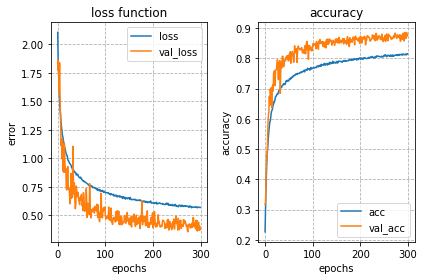

In [40]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('loss function')
ax[0].plot(np.arange(0, epochs), His.history['loss'])
ax[0].plot(np.arange(0, epochs), His.history['val_loss'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('error')
ax[0].grid(linestyle = '--')
ax[0].legend(['loss', 'val_loss'])
ax[1].set_title('accuracy')
ax[1].plot(np.arange(0, epochs), His.history['accuracy'])
ax[1].plot(np.arange(0, epochs), His.history['val_accuracy'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].grid(linestyle = '--')
ax[1].legend(['acc', 'val_acc'])
plt.tight_layout()

In [41]:
model.save("weights-best-file.hdf5")

In [42]:
score = model.evaluate(x_test, y_test, verbose=1)
print('loss: ', score[0])
print('acc: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8703
loss:  0.40759655833244324
acc:  0.8702999949455261
